In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("3_bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
df.shape

(10886, 12)

In [3]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
df['count'].sum()

2085476

In [5]:
df[['count','holiday']].groupby('holiday').mean()

,count
holiday,
0,191.741655
1,185.877814


##### Knowledge retrieved: There isn't a difference seen on the use of bikes on holidays.

In [6]:
df[['count','workingday']].groupby('workingday').mean()

,count
workingday,
0,188.506621
1,193.011873


##### Knowledge retrieved: There isn't a big difference between uses in dayframes.

In [7]:
df[['count', 'season']].groupby('season').mean()

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


##### Knowledge retrieved: It's wierd to see spring as the season with the least use of bikes as well as winter with an average use that's quite near summer. Fall is the prefered season for bikers apparently.
##### There should be other factors that must be influencing this.

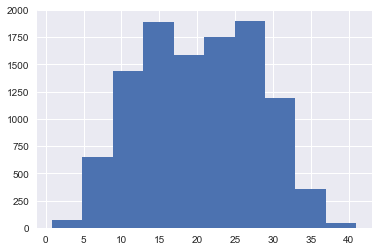

In [8]:
df['temp'].hist()

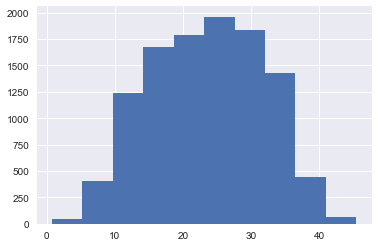

In [9]:
df['atemp'].hist()

##### Knowledge retrieved: Contemplating both histograms, it's clear that people's bike use depends on temperature sensation and not on the actual temperature.

In [10]:
df['casual'].sum()/2085476*100

18.8031413451893

In [11]:
df['registered'].sum()/2085476*100

81.1968586548107

##### Knowledge retrieved: There are a huge difference between casual and registered users. Nevertheless, what we cannot know in this sample is if poeple who were casual turned into registered. If we had this info, we would know if casual is a mean to tempt into a registration or if that percentage is actually from casual bikers.

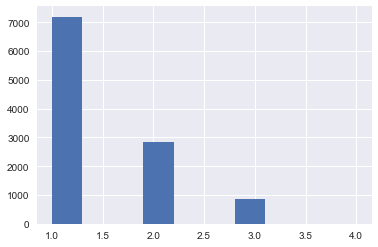

In [12]:
df['weather'].hist()

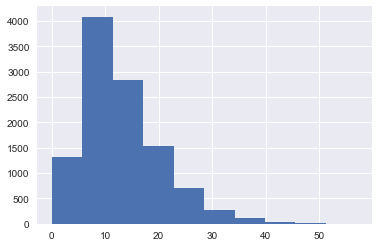

In [13]:
df['windspeed'].hist()

##### Knowledge retrieved: Contemplating both of this histograms, we can tell that the city has good weather. 
##### First of all, most days are clear, less than half of them are misty and a little few with rain.
##### Secondly, wind is not a problem in this city as most of the days have a favourable wind speed.

In [14]:
df[['count', 'windspeed']].groupby('windspeed').mean()

,count
windspeed,
0.0000,161.101295
6.0032,147.864679
7.0015,169.852031
8.9981,175.645536
11.0014,202.262062
12.9980,202.249520
15.0013,210.833507
16.9979,214.847087
19.0012,218.051775


##### Is extremely wierd to see a lot of people using the bike when wind is the highiest. There should be another reason for this to happen. Nevertheless, wind doesn't seem to be a variable affecting bike use.

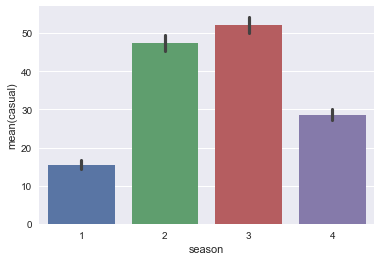

In [15]:
sns.barplot('season', 'casual', data=df)

##### Knowledge retrieved: The amount of casual bikers seems to be ciclical as they use them by season. It is logical to see low values in winter but it is strange that they are even lower in spring.

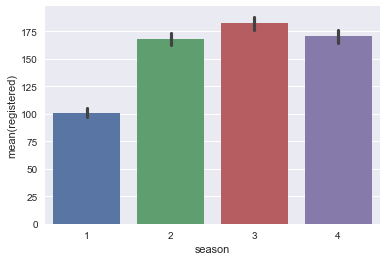

In [16]:
sns.barplot('season', 'registered', data=df)

##### Knowledge retrieved: It's wierd to see spring as the only month that registered bikers use bikes. This evidence one of two possibilities:
##### 1) The data comes from the first year of the programm and it started in spring, connotating the marketing penetration.
##### 2) People leave in spring for the holidays and obviously don't use their bike.

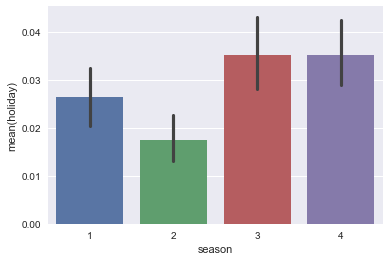

In [17]:
sns.barplot('season', 'holiday', data=df)

##### Knowledge retrieved: Summer is the season with the lowest holidays. However, these values still don't explain why spring has the least bike usage (should it have been the highest, we could have asume that people leave elsewhere and therefore not use the biking system)